In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.common.exceptions import *
import csv
import pandas as pd
from urllib.parse import urljoin
PATH="C:\Program Files (x86)"
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--blink-settings=imagesEnabled=false')
driver = webdriver.Chrome(chrome_options=chrome_options)
home_url = 'https://divar.ir'
url_file = 'AdsUrl.txt'


C:\Users\Alireza\AppData\Local\Temp\ipykernel_6316\3501914212.py:13: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [ ]:
screen_height = driver.execute_script(
    "return window.screen.height;")
with open(url_file, 'w', newline='', encoding='utf-8') as write_obj:
    write_obj.writelines('')
driver.get("https://divar.ir/s/tehran/car/peugeot/206/2")
f=0
for i in range(1000):

    # scroll one screen height each time
    driver.execute_script(
        "window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))
    time.sleep(1)

      # scrap the page
      # find tag div for ads
    for each_div in driver.find_elements(
        By.CSS_SELECTOR, '.post-card-item-af972.kt-col-6-bee95.kt-col-xxl-4-e9d46'):
        if each_div == None:
            continue
        url = ''

        # find a tag
        a_tag = each_div.find_element(By.TAG_NAME,'a' )

        if a_tag != None :
            url = urljoin(home_url, a_tag.get_attribute('href'))
            print(f)
            f=f+1
            # find the rent urls and save in the text file
            with open(url_file, 'a+', newline='', encoding='utf-8') as write_obj:
                write_obj.writelines(url + '\n')


In [15]:
def remove_duplicate_links(file_path):
    # Read the file and extract the links
    with open(file_path, 'r') as file:
        links = file.readlines()

    # Remove duplicate links while preserving the order
    unique_links = list(dict.fromkeys(links))

    # Write the unique links back to the file
    with open(file_path, 'w') as file:
        file.writelines(unique_links)

    print("Duplicate links removed and file updated.")


# Provide the file path as an argument to the function
file_path = "path/to/your/file.txt"
remove_duplicate_links(url_file)


Duplicate links removed and file updated.


In [3]:
data = []


In [ ]:
with open(url_file, 'r', newline='', encoding='utf-8') as read_obj:
    links = read_obj.readlines()
i=0

for link in links:
    try:
        driver.get(link)
        description_elements = driver.find_elements(By.CSS_SELECTOR, '.kt-group-row-item--info-row')
        if description_elements != None:
            details = {}
            for element in description_elements:
                title = element.find_element(
                    By.CLASS_NAME, 'kt-group-row-item__title').text
                value = element.find_element(
                    By.CLASS_NAME, 'kt-group-row-item__value').text
                details[title] = value
            second_set_elements = driver.find_elements(
                By.CSS_SELECTOR, '.kt-unexpandable-row')
            for element in second_set_elements:
                title = element.find_element(
                    By.CLASS_NAME, 'kt-unexpandable-row__title').text
                value = element.find_element(
                    By.CLASS_NAME, 'kt-unexpandable-row__value-box').text
                details[title] = value
            data.append(details)
            print(i)
            i=i+1
        else:
            print("not found")
    except Exception:
        print("not found")
        # Handle StaleElementReferenceException by re-finding the card elements and clicking again

In [20]:
csv_file_path = "data.csv"

# Save the data to CSV file
with open(csv_file_path, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # Write the data rows
    writer.writerows(data)


In [5]:
df = pd.DataFrame(data)


In [7]:
df.to_csv('cardata.csv',index=False,encoding='utf-8')

In [31]:
df

,کارکرد,مدل (سال تولید),رنگ,برند و تیپ,نوع سوخت,وضعیت موتور,وضعیت شاسی‌ها,وضعیت بدنه,مهلت بیمهٔ شخص ثالث,گیربکس,قیمت پایه,شاسی جلو,شاسی عقب,نمایشگاه,نوع آگهی,مایل به معاوضه,حداقل مبلغ پیش‌پرداخت,مبلغ هر قسط,تعداد اقساط,فروشنده
0,۳۰۰٬۰۰۰,۱۳۸۳,نقره‌ای,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی,۹ ماه,دنده‌ای,۱۸۶٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۴۶٬۰۰۰,۱۴۰۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,NaN,صافکاری بی‌رنگ,۱ ماه,دنده‌ای,۳۸۵٬۰۰۰٬۰۰۰ تومان,ضربه‌خورده,سالم و پلمپ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,۱۸٬۶۰۰,۱۳۹۹,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,سالم و بی‌خط و خش,۱۱ ماه,دنده‌ای,۴۳۲٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,۲۵۱٬۰۰۰,۱۳۸۸,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,خط و خش جزیی,۹ ماه,دنده‌ای,۲۶۸٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,۲۰۰٬۰۰۰,۱۳۹۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی، در ۲ ناحیه,۱۰ ماه,دنده‌ای,۲۹۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,۴۰٬۰۰۰,۱۴۰۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,خط و خش جزیی,۶ ماه,دنده‌ای,۴۲۵٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,۰,۱۴۰۱,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,سالم و بی‌خط و خش,۱۲ ماه,دنده‌ای,۴۹۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,مهراد خودرو,فروشی,NaN,NaN,NaN,NaN,NaN
1904,۱۲۰٬۰۰۰,۱۳۹۱,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی,۸ ماه,دنده‌ای,۲۸۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,فروشی,NaN,NaN,NaN,NaN,NaN
1905,۹۷٬۰۰۰,۱۳۹۶,سفید,پژو 206 تیپ ۲,بنزینی,سالم,NaN,رنگ‌شدگی، در ۲ ناحیه,NaN,NaN,۳۳۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
drop_columns = ['برند و تیپ', 'گیربکس', 'نوع سوخت', 'فروشنده', 'نوع آگهی','مبلغ هر قسط','تعداد اقساط']

In [30]:
df.dropna(how='all',axis=0,inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1906
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   کارکرد                 1691 non-null   object
 1   مدل (سال تولید)        1691 non-null   object
 2   رنگ                    1691 non-null   object
 3   برند و تیپ             1691 non-null   object
 4   نوع سوخت               1691 non-null   object
 5   وضعیت موتور            1691 non-null   object
 6   وضعیت شاسی‌ها          1691 non-null   object
 7   وضعیت بدنه             1691 non-null   object
 8   مهلت بیمهٔ شخص ثالث    1588 non-null   object
 9   گیربکس                 1602 non-null   object
 10  قیمت پایه              1691 non-null   object
 11  شاسی جلو               1691 non-null   object
 12  شاسی عقب               1691 non-null   object
 13  نمایشگاه               1691 non-null   object
 14  نوع آگهی               467 non-null    object
 15  مایل به معاوضه       

In [55]:
df['شاسی عقب'].value_counts()


سالم و پلمپ    1666
ضربه‌خورده       23
رنگ‌شده           2
Name: شاسی عقب, dtype: int64

In [54]:
df['شاسی عقب']=df['شاسی عقب'].fillna('سالم و پلمپ')


In [59]:
df['نوع سوخت'].value_counts()

بنزینی    1691
Name: نوع سوخت, dtype: int64

In [58]:
df['نوع سوخت'] = df['نوع سوخت'].fillna('بنزینی')


In [63]:
df['وضعیت موتور'].value_counts()


سالم             1670
تعویض شده          13
نیاز به تعمیر       8
Name: وضعیت موتور, dtype: int64

In [62]:
df['وضعیت موتور'] = df['وضعیت موتور'].fillna('سالم')


In [64]:
df['وضعیت شاسی‌ها'].value_counts()


سالم و پلمپ    1546
ضربه‌خورده       10
رنگ‌شده           1
Name: وضعیت شاسی‌ها, dtype: int64

In [65]:
df['وضعیت شاسی‌ها'] = df['وضعیت شاسی‌ها'].fillna('سالم و پلمپ')


In [68]:
df['وضعیت بدنه'].value_counts()


سالم و بی‌خط و خش       676
خط و خش جزیی            374
رنگ‌شدگی                350
دوررنگ                  166
تمام‌رنگ                 44
صافکاری بی‌رنگ           40
رنگ‌شدگی، در ۲ ناحیه     21
رنگ‌شدگی، در ۱ ناحیه     10
تصادفی                   10
Name: وضعیت بدنه, dtype: int64

In [67]:
df['وضعیت بدنه'] = df['وضعیت بدنه'].fillna('سالم و بی‌خط و خش')

In [70]:
df['شاسی جلو'].value_counts()

ضربه‌خورده     50
سالم و پلمپ    24
رنگ‌شده         6
Name: شاسی جلو, dtype: int64

In [71]:
df['شاسی جلو'] = df['شاسی جلو'].fillna('سالم و پلمپ')


In [72]:
df['نمایشگاه'].value_counts()

اتو خطیب             6
مهراد خودرو          5
دینو خودرو           5
سایپا جلالی          4
خودرو فیدار سپنتا    3
                    ..
آرمان خودرو          1
اتو آپادانا          1
اتوگالری محمدی       1
اتو شناس 2           1
اتو علایی            1
Name: نمایشگاه, Length: 78, dtype: int64

In [73]:
df['نمایشگاه'] = df['نمایشگاه'].fillna('شخصی')

In [76]:
df['مایل به معاوضه'].value_counts()

هستم    323
Name: مایل به معاوضه, dtype: int64

In [77]:
df['مایل به معاوضه'] = df['مایل به معاوضه'].fillna('نیستم')


In [82]:
df['حداقل مبلغ پیش‌پرداخت'].value_counts()

0    1650
Name: حداقل مبلغ پیش‌پرداخت, dtype: int64

In [79]:
df['حداقل مبلغ پیش‌پرداخت'] = df['حداقل مبلغ پیش‌پرداخت'].fillna(0)


In [81]:
df.drop(df.loc[df['حداقل مبلغ پیش‌پرداخت']!=0].index, inplace=True)

In [36]:
df.drop(df.loc[df['برند و تیپ']!='پژو 206 تیپ ۲'].index, inplace=True)

In [129]:
df_test=df

In [134]:
df['نمایشگاه'].value_counts()

شخصی         1568
نمایشگاهی      75
Name: نمایشگاه, dtype: int64

In [135]:
df.loc[df['نمایشگاه']!='شخصی','نمایشگاه']='نمایشگاهی'

In [111]:
df['قیمت پایه'].value_counts()

210000000    36
230000000    33
410000000    32
280000000    28
220000000    27
             ..
407000000     1
313000000     1
454000000     1
115000000     1
479000000     1
Name: قیمت پایه, Length: 280, dtype: int64

In [95]:
df.drop(df.loc[df['قیمت پایه']=='توافقی'].index, inplace=True)

In [109]:
import numpy as np

In [144]:
df['کارکرد']=df['کارکرد'].str.replace('٬', '').astype(np.int64)

In [146]:
df['مدل (سال تولید)']=df['مدل (سال تولید)'].astype(np.int64)

In [ ]:
df['قیمت پایه']=df['قیمت پایه'].str.replace('تومان', '')
df['قیمت پایه']=df['قیمت پایه'].str.replace('٬', '')

In [ ]:
df['قیمت پایه']=df['قیمت پایه'].astype(np.int64)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 0 to 1905
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   کارکرد               1643 non-null   object
 1   مدل (سال تولید)      1643 non-null   object
 2   رنگ                  1643 non-null   object
 3   وضعیت موتور          1643 non-null   object
 4   وضعیت شاسی‌ها        1643 non-null   object
 5   وضعیت بدنه           1643 non-null   object
 6   مهلت بیمهٔ شخص ثالث  1551 non-null   object
 7   قیمت پایه            1643 non-null   object
 8   شاسی جلو             1643 non-null   object
 9   شاسی عقب             1643 non-null   object
 10  نمایشگاه             1643 non-null   object
 11  مایل به معاوضه       1643 non-null   object
dtypes: object(12)
memory usage: 166.9+ KB


In [86]:
df.drop(drop_columns,inplace=True,axis=1)

In [91]:
df.drop('حداقل مبلغ پیش‌پرداخت',inplace=True,axis=1)

In [117]:
df['مهلت بیمهٔ شخص ثالث']=df['مهلت بیمهٔ شخص ثالث'].fillna('0')

In [120]:
df['مهلت بیمهٔ شخص ثالث'].value_counts()

6     247
12    181
8     161
9     135
10    122
7     121
5     113
11    110
3     109
4     103
0      92
2      77
1      72
Name: مهلت بیمهٔ شخص ثالث, dtype: int64

In [119]:
df['مهلت بیمهٔ شخص ثالث']=df['مهلت بیمهٔ شخص ثالث'].str.replace('ماه', '').astype(int)

In [34]:
df2=pd.read_csv('cardata.csv')

In [92]:
list(df.columns.values)

['کارکرد',
 'مدل (سال تولید)',
 'رنگ',
 'وضعیت موتور',
 'وضعیت شاسی\u200cها',
 'وضعیت بدنه',
 'مهلت بیمهٔ شخص ثالث',
 'قیمت پایه',
 'شاسی جلو',
 'شاسی عقب',
 'نمایشگاه',
 'مایل به معاوضه']

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


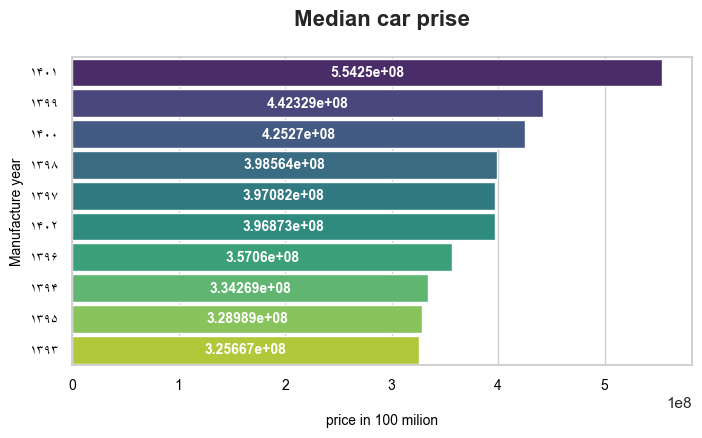

In [114]:
plt.figure(figsize=(8,4))
# Job titles and associated average salary
top_salary = df.groupby('مدل (سال تولید)').agg({'قیمت پایه': 'mean'}).round(
    2).sort_values('قیمت پایه', ascending=False).head(10)
top_salary.head(10)

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='قیمت پایه', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Median car prise\n', fontsize=16, fontweight="bold", loc="center")
plt.xlabel('\nprice in 100 milion', color="black", fontsize=10)
plt.ylabel('Manufacture year', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show() #not needed in Jupyter environment but this opens the plot in another window in other environments

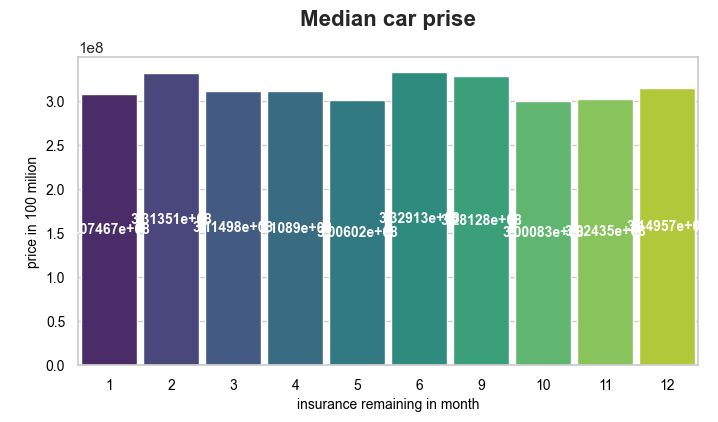

In [124]:
plt.figure(figsize=(8,4))
# Job titles and associated average salary
top_salary = df.groupby('مهلت بیمهٔ شخص ثالث').agg({'قیمت پایه': 'mean'}).round(
    2).sort_values('قیمت پایه', ascending=True).head(10)
top_salary.head(10)

sns.set(style="whitegrid")
ax= sns.barplot(x = top_salary.index, y ='قیمت پایه', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Median car prise\n', fontsize=16, fontweight="bold", loc="center")
plt.ylabel('\nprice in 100 milion', color="black", fontsize=10)
plt.xlabel('insurance remaining in month', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show() #not needed in Jupyter environment but this opens the plot in another window in other environments

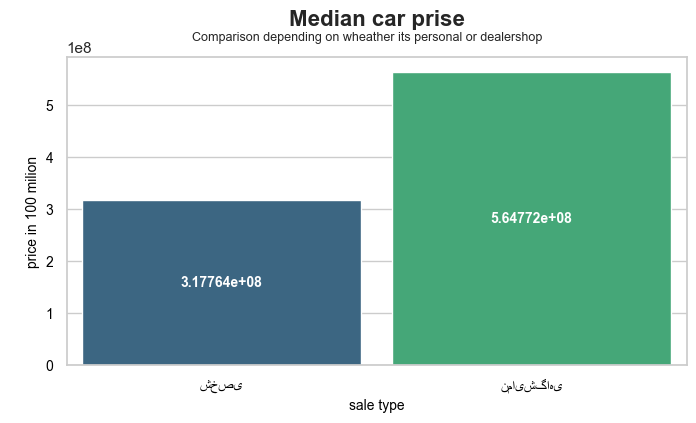

In [142]:
plt.figure(figsize=(8,4))
# Job titles and associated average salary
top_salary = df.groupby('نمایشگاه').agg({'قیمت پایه': 'mean'}).round(
    2).sort_values('قیمت پایه', ascending=True).head(10)
top_salary.head(10)

sns.set(style="whitegrid")
ax= sns.barplot(x = top_salary.index, y ='قیمت پایه', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Median car prise\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle('\nComparison depending on wheather its personal or dealershop\n',fontsize=9)
plt.ylabel('\nprice in 100 milion', color="black", fontsize=10)
plt.xlabel('sale type', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show() #not needed in Jupyter environment but this opens the plot in another window in other environments

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score


In [163]:
df_test=df

In [168]:
df_test['رنگ']=pd.Categorical(df_test['رنگ']).codes.astype(int)
df_test['وضعیت موتور']=pd.Categorical(df_test['وضعیت موتور']).codes.astype(int)
df_test['وضعیت شاسی‌ها']=pd.Categorical(df_test['وضعیت شاسی‌ها']).codes.astype(int)
df_test['وضعیت بدنه']=pd.Categorical(df_test['وضعیت بدنه']).codes.astype(int)
df_test['شاسی جلو']=pd.Categorical(df_test['شاسی جلو']).codes.astype(int)
df_test['شاسی عقب']=pd.Categorical(df_test['شاسی عقب']).codes.astype(int)
df_test['نمایشگاه']=pd.Categorical(df_test['نمایشگاه']).codes.astype(int)
df_test['مایل به معاوضه']=pd.Categorical(df_test['مایل به معاوضه']).codes.astype(int)

In [170]:
X = df_test.drop('قیمت پایه', axis=1)
y = df_test['قیمت پایه']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('classifier', SVC())
])

# Define the parameter space for grid search
param_grid = {
    'classifier__C': [0.1,0.5, 1,5, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf'],
    'classifier__gamma':[0.1, 0.01, 0.001]
}

In [171]:
# Initialize the grid search and fit it on the data
grid_search = GridSearchCV(pipeline, param_grid, cv=5,)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# Score the model on the test data
score = grid_search.score(X_test, y_test)
print('Test score:', score)


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Create a new SVM model with the best parameters
best_svm_model = SVC(
    C=best_params['classifier__C'], gamma=best_params['classifier__gamma'], kernel=best_params['classifier__kernel'])

# Fit the model on the training data
best_svm_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = best_svm_model.predict(X_test)

y_predGrid = best_svm_model.predict(X_test)

precisionGrid = precision_score(y_test, y_predGrid)
recallGrid = recall_score(y_test, y_predGrid)

print('Precision:', precisionGrid)
print('Recall:', recallGrid)
